In [1]:
%pylab inline

from PyAstronomy.pyasl.asl.astroTimeLegacy import get_juldate, juldate, datetime
import time, cycler

Populating the interactive namespace from numpy and matplotlib


In [2]:
clist  = "#114477 #117755 #E8601C #771111 #771144 #4477AA #44AA88 #F1932D #AA4477 #774411 #777711 #AA4455".split()
ccycle = cycler.cycler("color", clist)

rc("figure", figsize=(6, 6))
rc("font", family="sans-serif", serif="Helvetica", size=20, weight=600)
rc("savefig", dpi=92, format="png")
rc("legend", fontsize="x-small")
rc("xtick", labelsize="xx-small")
rc("ytick", labelsize="xx-small")
rc("axes", linewidth=1.0, labelsize="medium", titlesize="medium", labelweight="bold", prop_cycle=ccycle)
rc("text", usetex=False)
rc("legend", numpoints=1, fontsize="medium", frameon=False)
rc("lines", linewidth=2.0, markeredgewidth=0.0, markersize=7)
rc("patch", linewidth=0.0)

In [3]:
random.seed(time.localtime().tm_yday)
GMTCorr = 0.18752167467027903
RedJulD = 2400000

StList = {"Marie":    1.0,
          "Eddy":     1.0,
          "Adriana":  1.0,
          "Alfredo":  1.0,
          "Maria":    1.0,
          "Alice":    1.0,
          "Ibranny":  1.0,
          "Eugenio":  1.0,
          "Luis V":   1.0,
          "Taurimay": 1.0}
ReList = {"Carlos":   1.0,
          "Gladis":   1.0,
          "Jesus":    1.0,
          "Kathy":    1.0,
          "Cecilia":  1.0,
          "Juan":     1.0,
          "Giuliat":  1.0,
          "Elvis":    1.0,
          "Luis R":   1.0}

StLast = {"Marie":    [2015, 8, 1],
          "Eddy":     [2015, 8, 1],
          "Adriana":  [2015, 8, 1],
          "Alfredo":  [2015, 8, 1],
          "Maria":    [2015, 8, 1],
          "Alice":    [2015, 8, 1],
          "Ibranny":  [2015, 8, 1],
          "Eugenio":  [2015, 8, 1],
          "Luis V":   [2015, 8, 1],
          "Taurimay": [2015, 8, 1]}
ReLast = {"Carlos":   [2015, 8, 1],
          "Gladis":   [2015, 8, 1],
          "Jesus":    [2015, 8, 1],
          "Kathy":    [2015, 8, 1],
          "Cecilia":  [2015, 8, 1],
          "Juan":     [2015, 8, 1],
          "Giuliat":  [2015, 8, 1],
          "Elvis":    [2015, 8, 1],
          "Luis R":   [2015, 8, 1]}

def StWeights():
    names = sorted(StList.keys())
    for name in names:
        last = datetime.datetime(*StLast[name])
        StList[name] = get_juldate()-GMTCorr-RedJulD-juldate(last)

def ReWeights():
    names = sorted(ReList.keys())
    for name in names:
        last = datetime.datetime(*ReLast[name])
        ReList[name] = get_juldate()-GMTCorr-RedJulD-juldate(last)

In [4]:
for name in StLast: print "{0:10s} {1:s}".format(name, StLast[name])
print
for name in ReLast: print "{0:10s} {1:s}".format(name, ReLast[name])

Eddy       [2015, 8, 1]
Ibranny    [2015, 8, 1]
Adriana    [2015, 8, 1]
Eugenio    [2015, 8, 1]
Alfredo    [2015, 8, 1]
Taurimay   [2015, 8, 1]
Marie      [2015, 8, 1]
Luis V     [2015, 8, 1]
Alice      [2015, 8, 1]
Maria      [2015, 8, 1]

Gladis     [2015, 8, 1]
Kathy      [2015, 8, 1]
Giuliat    [2015, 8, 1]
Cecilia    [2015, 8, 1]
Luis R     [2015, 8, 1]
Juan       [2015, 8, 1]
Elvis      [2015, 8, 1]
Carlos     [2015, 8, 1]
Jesus      [2015, 8, 1]


In [8]:
StLast["Eddy"] = [2015, 11, 25]
StLast["Eugenio"] = [2015, 11, 25]
StLast["Alfredo"] = [2015, 10, 21]
StLast["Luis V"] = [2015, 12, 7]

ReLast["Cecilia"] = [2015, 11, 4]
ReLast["Juan"] = [2015, 10, 21]
ReLast["Gladis"] = [2015, 12, 7]

StWeights()
ReWeights()

# No ESTAN ================================
StList["Adriana"] = 0
# =========================================

for name in StLast: print "{0:10s}: {1:5.2f}%".format(name, StList[name]*100/sum(StList.values()))
print
for name in ReLast: print "{0:10s}: {1:5.2f}%".format(name, ReList[name]*100/sum(ReList.values()))

Eddy      :  4.61%
Ibranny   : 15.87%
Adriana   :  0.00%
Eugenio   :  4.61%
Alfredo   :  8.01%
Taurimay  : 15.87%
Marie     : 15.87%
Luis V    :  3.44%
Alice     : 15.87%
Maria     : 15.87%

Gladis    :  3.04%
Kathy     : 14.00%
Giuliat   : 14.00%
Cecilia   :  5.87%
Luis R    : 14.00%
Juan      :  7.07%
Elvis     : 14.00%
Carlos    : 14.00%
Jesus     : 14.00%


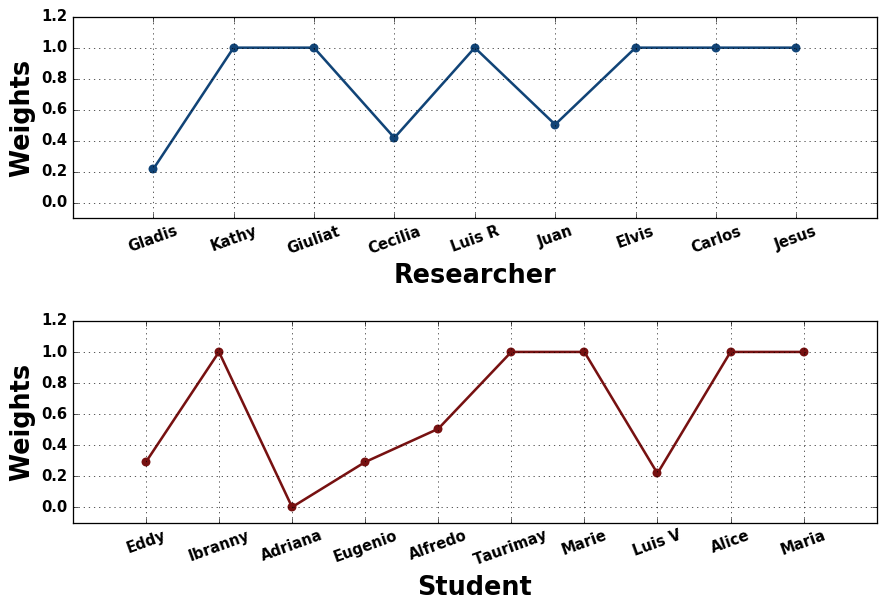

In [9]:
fig, axs = subplots(2, 1, figsize=(10, 7), sharey=True)

ylim(-0.1, 1.2)

axs[0].plot(range(1, len(ReList)+1), ReList.values()/np.max(ReList.values()), "o-", color=clist[0])
axs[0].set_xlim(0, len(ReList)+1)
axs[0].set_xticks(range(0, len(ReList)+2))
axs[0].set_xticklabels([""]+ReList.keys()+[""], rotation=20)
axs[0].grid()
axs[0].set_xlabel("Researcher")
axs[0].set_ylabel("Weights")

axs[1].plot(range(1, len(StList)+1), StList.values()/np.max(StList.values()), "o-", color=clist[3])
axs[1].set_xlim(0, len(StList)+1)
axs[1].set_xticks(range(0, len(StList)+2))
axs[1].set_xticklabels([""]+StList.keys()+[""], rotation=20)
axs[1].grid()
axs[1].set_xlabel("Student")
axs[1].set_ylabel("Weights")

fig.tight_layout()
pass

In [10]:
StChoice = random.choice(StList.keys(), 2, replace=False, p=StList.values()/sum(StList.values()))
ReChoice = random.choice(ReList.keys(), 1, replace=False, p=ReList.values()/sum(ReList.values()))

print "Researcher: {}".format(ReChoice[0])
print "Students  : {} & {}".format(*StChoice)

Researcher: Luis R
Students  : Alice & Taurimay
